# 4. Sentiment Analysis

### Loading in data

In [147]:
#pip install vaderSentiment

In [148]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [1]:
#df = pd.read_pickle("df_clean_no_lemma.pkl")  
#df.head()
#input for sentiment analysis is the corpus

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 195
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      177 non-null    float64
 1   Q2 years      176 non-null    float64
 2   Q3            173 non-null    object 
 3   Q4            180 non-null    float64
 4   Q5            79 non-null     object 
 5   Q6            155 non-null    float64
 6   Q7            39 non-null     object 
 7   Q8            98 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           109 non-null    object 
 10  Q11           109 non-null    object 
 11  Q12           149 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           112 non-null    object 
 14  Q15           86 non-null     object 
 15  Q16 rank_cat  152 non-null    float64
dtypes: float64(6), object(10)
memory usage: 24.2+ KB


# 4.1 Q5
Q5: If yes, what have you seen or heard?  <b>Topic modeling and sentiment analysis</b>  

In [2]:
#q5 = df['Q5'].dropna(axis=0)
#q5

In [152]:
#converting it to a df now
q5 = q5.to_frame()

In [153]:
#sanity check
q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 6 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q5      79 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB


In [3]:
#code taken from nlp exercise 7 Metis
#analyzer = SentimentIntensityAnalyzer()
#q5['score'] = q5['Q5'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
#q5.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


In [4]:
#lowest score
#print(q5[q5.score == q5.score.min()])

In [5]:
#highest score
#print(q5[q5.score == q5.score.max()])

In [157]:
#what is the average sentiment across the 109 responses?
q5.score.mean()
#pretty neutral score...

0.08622911392405065

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences.... 

In [158]:
#https://www.statology.org/pandas-merge-on-index/
df_q5_only = pd.merge(df, q5, left_index=True, right_index=True)

In [159]:
df_q5_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 6 to 195
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      77 non-null     float64
 1   Q2 years      76 non-null     float64
 2   Q3            79 non-null     object 
 3   Q4            78 non-null     float64
 4   Q5_x          79 non-null     object 
 5   Q6            79 non-null     float64
 6   Q7            32 non-null     object 
 7   Q8            62 non-null     object 
 8   Q9            44 non-null     object 
 9   Q10           65 non-null     object 
 10  Q11           65 non-null     object 
 11  Q12           77 non-null     float64
 12  Q13           14 non-null     object 
 13  Q14           70 non-null     object 
 14  Q15           53 non-null     object 
 15  Q16 rank_cat  76 non-null     float64
 16  Q5_y          79 non-null     object 
 17  score         79 non-null     float64
dtypes: float64(7), object(11)
memor

In [160]:
df_q5_only = df_q5_only.drop('Q5_y', axis=1)
df_q5_only.rename(columns={"Q5_x": "Q5"}, inplace=True)

df_q5_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 6 to 195
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      77 non-null     float64
 1   Q2 years      76 non-null     float64
 2   Q3            79 non-null     object 
 3   Q4            78 non-null     float64
 4   Q5            79 non-null     object 
 5   Q6            79 non-null     float64
 6   Q7            32 non-null     object 
 7   Q8            62 non-null     object 
 8   Q9            44 non-null     object 
 9   Q10           65 non-null     object 
 10  Q11           65 non-null     object 
 11  Q12           77 non-null     float64
 12  Q13           14 non-null     object 
 13  Q14           70 non-null     object 
 14  Q15           53 non-null     object 
 15  Q16 rank_cat  76 non-null     float64
 16  score         79 non-null     float64
dtypes: float64(7), object(10)
memory usage: 11.1+ KB


In [161]:
df_q5_only["Q16 rank_cat"].value_counts()

1.0    44
2.0    13
5.0     7
3.0     6
4.0     5
6.0     1
Name: Q16 rank_cat, dtype: int64

In [162]:
df_q5_only.groupby(["Q16 rank_cat"]).score.mean()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

Q16 rank_cat
1.0    0.113700
2.0    0.244131
3.0   -0.001617
4.0   -0.127380
5.0   -0.008657
6.0   -0.296000
Name: score, dtype: float64

Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  


In [163]:
df_q5_only.groupby(["Q12"]).score.mean()

Q12
0.0    0.130280
1.0   -0.028511
Name: score, dtype: float64

Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    

In [164]:
df_q5_only.groupby(["Q6"]).score.mean()

Q6
0.0    0.087443
1.0    0.084536
Name: score, dtype: float64

Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>

In [165]:
df_q5_only.groupby(["Q4"]).score.mean()

Q4
1.0    0.081688
Name: score, dtype: float64

Q2: How long have you been in the [DOD] (or connected to the [DOD], if civilian)?  <b>Coded as YEARS</b>  

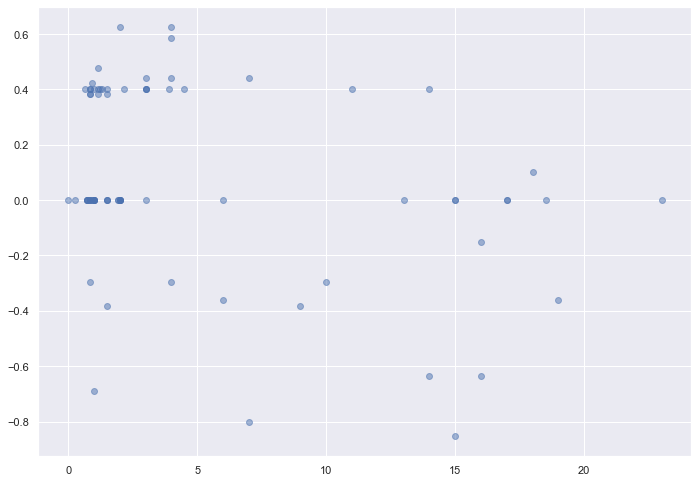

In [166]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q5_only['Q2 years'], df_q5_only['score'], alpha=0.5)
plt.show()

Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  

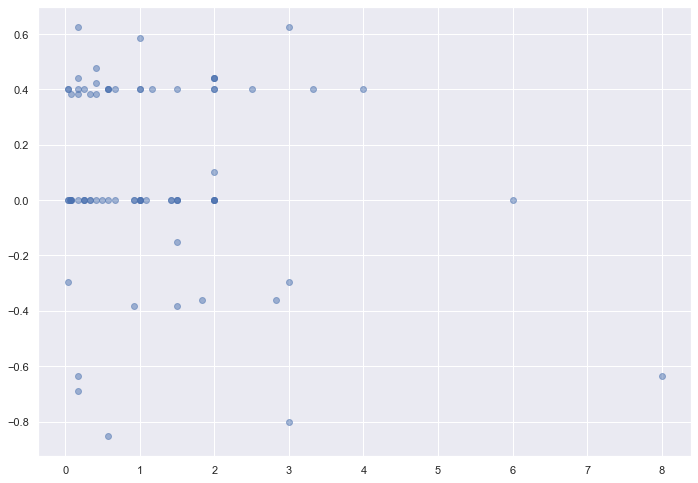

In [167]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q5_only['Q1 years'], df_q5_only['score'], alpha=0.5)
plt.show()

# 4.2 Q7
Q5: If yes, what have you seen or heard?  <b>Topic modeling and sentiment analysis</b>  

In [6]:
#q7 = df['Q7'].dropna(axis=0)
#q7

In [169]:
#converting it to a df now
q7 = q7.to_frame()

In [170]:
#sanity check
q7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 6 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q7      39 non-null     object
dtypes: object(1)
memory usage: 624.0+ bytes


In [7]:
#code taken from nlp exercise 7 Metis
#analyzer = SentimentIntensityAnalyzer()
#q7['score'] = q7['Q7'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
#q7.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


In [8]:
#lowest score
#print(q7[q7.score == q7.score.min()])

In [9]:
#highest score
#print(q7[q7.score == q7.score.max()])

In [174]:
#what is the average sentiment across the 109 responses?
q7.score.mean()
#pretty neutral score...

-0.005356410256410266

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences.... 

In [175]:
#https://www.statology.org/pandas-merge-on-index/
df_q7_only = pd.merge(df, q7, left_index=True, right_index=True)

In [176]:
df_q7_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 6 to 195
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      38 non-null     float64
 1   Q2 years      38 non-null     float64
 2   Q3            38 non-null     object 
 3   Q4            38 non-null     float64
 4   Q5            32 non-null     object 
 5   Q6            39 non-null     float64
 6   Q7_x          39 non-null     object 
 7   Q8            37 non-null     object 
 8   Q9            28 non-null     object 
 9   Q10           36 non-null     object 
 10  Q11           37 non-null     object 
 11  Q12           38 non-null     float64
 12  Q13           9 non-null      object 
 13  Q14           36 non-null     object 
 14  Q15           28 non-null     object 
 15  Q16 rank_cat  39 non-null     float64
 16  Q7_y          39 non-null     object 
 17  score         39 non-null     float64
dtypes: float64(7), object(11)
memor

In [177]:
df_q7_only = df_q7_only.drop('Q7_y', axis=1)
df_q7_only.rename(columns={"Q7_x": "Q7"}, inplace=True)

df_q7_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 6 to 195
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      38 non-null     float64
 1   Q2 years      38 non-null     float64
 2   Q3            38 non-null     object 
 3   Q4            38 non-null     float64
 4   Q5            32 non-null     object 
 5   Q6            39 non-null     float64
 6   Q7            39 non-null     object 
 7   Q8            37 non-null     object 
 8   Q9            28 non-null     object 
 9   Q10           36 non-null     object 
 10  Q11           37 non-null     object 
 11  Q12           38 non-null     float64
 12  Q13           9 non-null      object 
 13  Q14           36 non-null     object 
 14  Q15           28 non-null     object 
 15  Q16 rank_cat  39 non-null     float64
 16  score         39 non-null     float64
dtypes: float64(7), object(10)
memory usage: 5.5+ KB


In [178]:
df_q7_only["Q16 rank_cat"].value_counts()

2.0    13
1.0    11
5.0     7
4.0     5
3.0     3
Name: Q16 rank_cat, dtype: int64

In [179]:
df_q7_only.groupby(["Q16 rank_cat"]).score.mean()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

Q16 rank_cat
1.0    0.019745
2.0   -0.030608
3.0    0.019533
4.0    0.008180
5.0   -0.018243
Name: score, dtype: float64

Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  


In [180]:
df_q7_only.groupby(["Q12"]).score.mean()

Q12
0.0    0.018782
1.0   -0.009790
Name: score, dtype: float64

Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    

In [181]:
df_q7_only.groupby(["Q6"]).score.mean()

Q6
0.0    0.127267
1.0   -0.016408
Name: score, dtype: float64

Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>

In [182]:
df_q7_only.groupby(["Q4"]).score.mean()

Q4
0.0   -0.000360
1.0   -0.018455
Name: score, dtype: float64

Q2: How long have you been in the [DOD] (or connected to the [DOD], if civilian)?  <b>Coded as YEARS</b>  

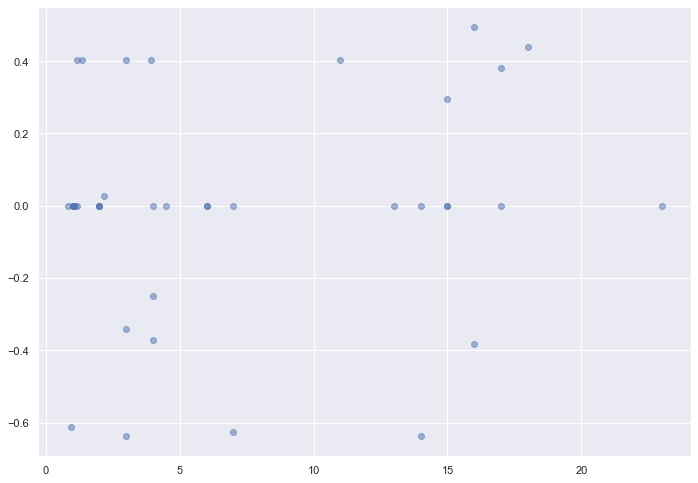

In [183]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q7_only['Q2 years'], df_q7_only['score'], alpha=0.5)
plt.show()

Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  

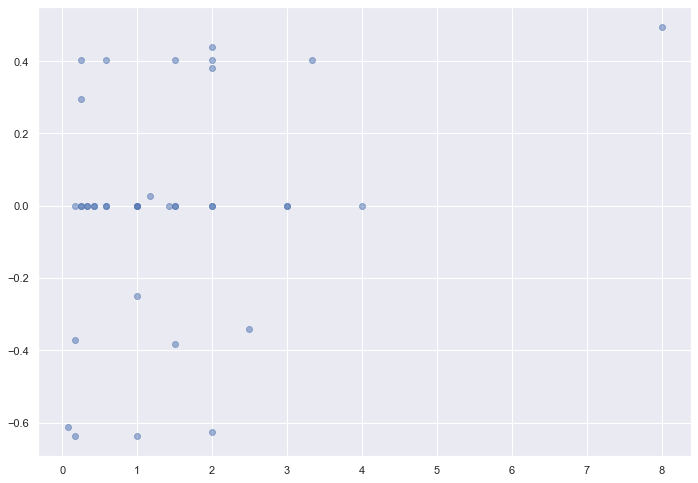

In [184]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q7_only['Q1 years'], df_q7_only['score'], alpha=0.5)
plt.show()

# 4.3 Q9
Q9: Do you have any other thoughts or suggestions?  <b>Topic modeling and sentiment analysis</b>  

In [10]:
#q14 = df['Q14'].dropna(axis=0)
#q14

In [186]:
#converting it to a df now
q14 = q14.to_frame()

In [187]:
#sanity check
q14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q14     112 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [188]:
#code taken from nlp exercise 7 Metis
analyzer = SentimentIntensityAnalyzer()
q14['score'] = q14['Q14'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
q14.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


,Q14,score
6,i do not know,0.0000
7,new co not sure yet,-0.2411
8,no we hardly have any contact with command at all and never hear from them,-0.2960
9,my spouse s command is very supportive of families and seems to do what is in the best interest of service members and the families,0.8655
10,they are giving training about the services you offer,0.3400


In [189]:
#lowest score
print(q14[q14.score == q14.score.min()])

                            Q14   score
53  meet violence with violence -0.8481


In [190]:
#highest score
print(q14[q14.score == q14.score.max()])

                                                                                                                 Q14  \
60  i can not but i do know its zero tolerance and the command will ensure the family is given the necessary support   

     score  
60  0.8674  


In [191]:
#what is the average sentiment across the 109 responses?
q14.score.mean()
#pretty neutral score...

0.0005062500000000067

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences.... 



In [192]:
#https://www.statology.org/pandas-merge-on-index/
df_q14_only = pd.merge(df, q14, left_index=True, right_index=True)

In [193]:
df_q14_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 194
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      110 non-null    float64
 1   Q2 years      108 non-null    float64
 2   Q3            111 non-null    object 
 3   Q4            111 non-null    float64
 4   Q5            70 non-null     object 
 5   Q6            112 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            91 non-null     object 
 8   Q9            70 non-null     object 
 9   Q10           99 non-null     object 
 10  Q11           99 non-null     object 
 11  Q12           112 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14_x         112 non-null    object 
 14  Q15           84 non-null     object 
 15  Q16 rank_cat  111 non-null    float64
 16  Q14_y         112 non-null    object 
 17  score         112 non-null    float64
dtypes: float64(7), object(11)
memo

In [194]:
df_q14_only = df_q14_only.drop('Q14_y', axis=1)
df_q14_only.rename(columns={"Q14_x": "Q14"}, inplace=True)

df_q14_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 194
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      110 non-null    float64
 1   Q2 years      108 non-null    float64
 2   Q3            111 non-null    object 
 3   Q4            111 non-null    float64
 4   Q5            70 non-null     object 
 5   Q6            112 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            91 non-null     object 
 8   Q9            70 non-null     object 
 9   Q10           99 non-null     object 
 10  Q11           99 non-null     object 
 11  Q12           112 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14           112 non-null    object 
 14  Q15           84 non-null     object 
 15  Q16 rank_cat  111 non-null    float64
 16  score         112 non-null    float64
dtypes: float64(7), object(10)
memory usage: 15.8+ KB


In [195]:
df_q14_only["Q16 rank_cat"].value_counts()

1.0    68
2.0    23
3.0     7
4.0     7
5.0     5
6.0     1
Name: Q16 rank_cat, dtype: int64

In [12]:
#Df_q14_only.groupby(["Q16 rank_cat"]).score.mean()

#E1-E3: junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  


In [197]:
df_q14_only.groupby(["Q12"]).score.mean()

Q12
0.0    0.022174
1.0   -0.099165
Name: score, dtype: float64

Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    

In [198]:
df_q14_only.groupby(["Q6"]).score.mean()

Q6
0.0   -0.025415
1.0    0.059974
Name: score, dtype: float64

Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>

In [199]:
df_q14_only.groupby(["Q4"]).score.mean()

Q4
0.0   -0.046252
1.0    0.017049
Name: score, dtype: float64

Q2: How long have you been in the [DOD] (or connected to the [DOD], if civilian)?  <b>Coded as YEARS</b>  

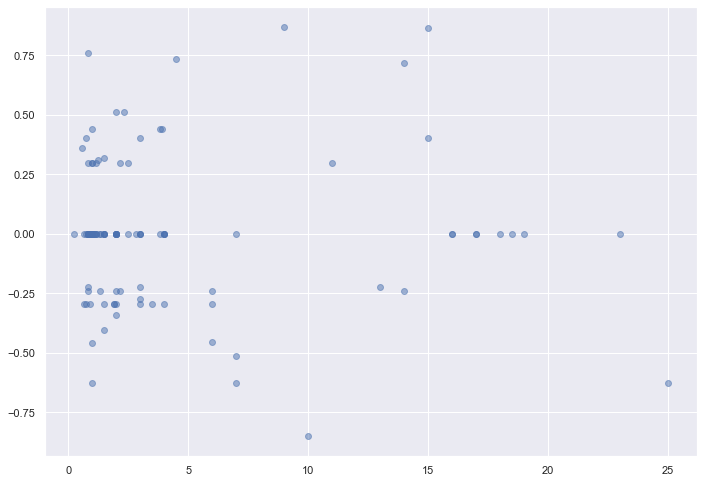

In [200]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q14_only['Q2 years'], df_q14_only['score'], alpha=0.5)
plt.show()

Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  

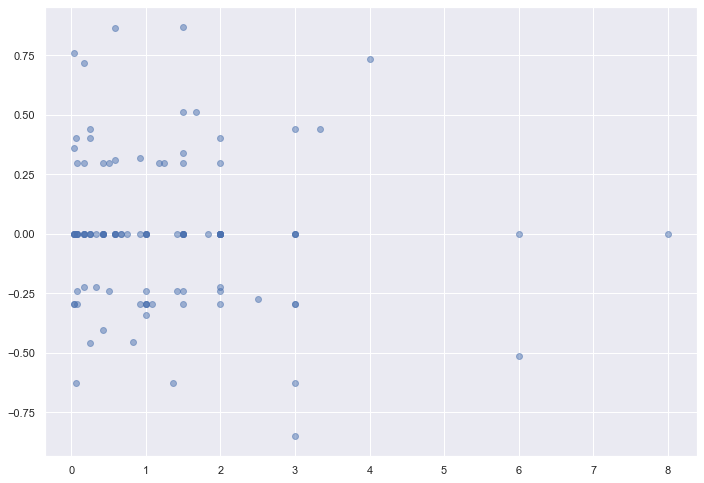

In [201]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q14_only['Q1 years'], df_q14_only['score'], alpha=0.5)
plt.show()

# 4.4 Q10
Q10: What is your impression of the relationships [DOD] have with their children here in [LOCATION]?  <b>Sentiment analysis</b>  


In [13]:
#df['Q10']

In [14]:
#q10 = df['Q10'].dropna(axis=0)
#q10

In [204]:
q10.shape
#109 is how many rows we should have

(109,)

In [205]:
#converting it to a df now
q10 = q10.to_frame()

In [206]:
#sanity check
q10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q10     109 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [207]:
#code taken from nlp exercise 7 Metis
analyzer = SentimentIntensityAnalyzer()
q10['score'] = q10['Q10'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
q10.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


,Q10,score
6,over all normal,0.0000
7,involved with sports family time on the weekends,0.0000
8,i do not know a lot of fathers here but it seems pretty hands off with mothers handling most of the care,0.8749
9,i do not have children or many friends with kids so it is hard to say,0.3477
13,do not know any,0.0000


In [208]:
#lowest score
#let's be sure to display the entire response for q10
pd.set_option('display.max_colwidth', None)
print(q10[q10.score == q10.score.min()])

        Q10   score
74  abusive -0.6369


In [209]:
#highest score
print(q10[q10.score == q10.score.max()])

                                                                        Q10  \
48  good most parents in my neighborhood appear to be loving caring parents   

    score  
48  0.875  


In [210]:
#what is the average sentiment across the 109 responses?
q10.score.mean()

0.24791192660550473

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences.... 



In [15]:
#https://www.statology.org/pandas-merge-on-index/
#df_q10_only = pd.merge(df, q10, left_index=True, right_index=True)
#df_q10_only.head()

In [212]:
df_q10_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      108 non-null    float64
 1   Q2 years      107 non-null    float64
 2   Q3            107 non-null    object 
 3   Q4            108 non-null    float64
 4   Q5            65 non-null     object 
 5   Q6            109 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            94 non-null     object 
 8   Q9            72 non-null     object 
 9   Q10_x         109 non-null    object 
 10  Q11           108 non-null    object 
 11  Q12           109 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14           99 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  108 non-null    float64
 16  Q10_y         109 non-null    object 
 17  score         109 non-null    float64
dtypes: float64(7), object(11)
memo

In [213]:
df_q10_only = df_q10_only.drop('Q10_y', axis=1)
df_q10_only.rename(columns={"Q10_x": "Q10"}, inplace=True)

df_q10_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      108 non-null    float64
 1   Q2 years      107 non-null    float64
 2   Q3            107 non-null    object 
 3   Q4            108 non-null    float64
 4   Q5            65 non-null     object 
 5   Q6            109 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            94 non-null     object 
 8   Q9            72 non-null     object 
 9   Q10           109 non-null    object 
 10  Q11           108 non-null    object 
 11  Q12           109 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14           99 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  108 non-null    float64
 16  score         109 non-null    float64
dtypes: float64(7), object(10)
memory usage: 15.3+ KB


In [17]:
#df_q10_only.groupby(["Q16 rank_cat"]).score.mean()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

In [215]:
df_q10_only.groupby(["Q12"]).score.mean()

Q12
0.0    0.245806
1.0    0.256738
Name: score, dtype: float64

In [216]:
df_q10_only.groupby(["Q6"]).score.mean()

Q6
0.0    0.194978
1.0    0.359829
Name: score, dtype: float64

In [217]:
df_q10_only.groupby(["Q4"]).score.mean()

Q4
0.0    0.143717
1.0    0.283062
Name: score, dtype: float64

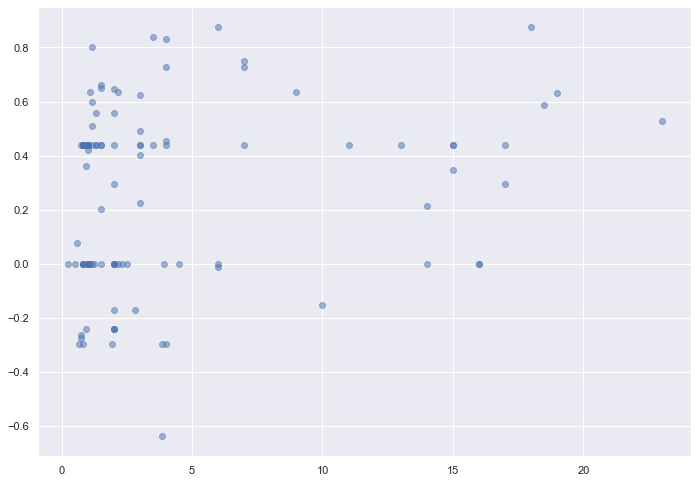

In [218]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q10_only['Q2 years'], df_q10_only['score'], alpha=0.5)
plt.show()

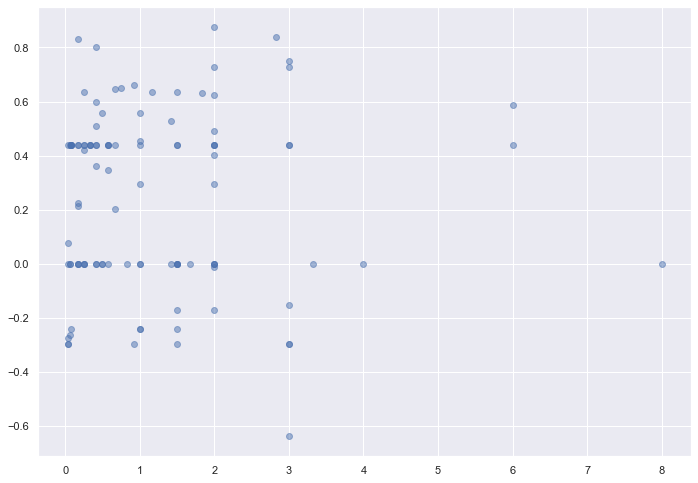

In [219]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q10_only['Q1 years'], df_q10_only['score'], alpha=0.5)
plt.show()

# 4.5 Q11
Q11: What is your impression of the relationships [DOD] have with their significant others in [LOCATION]?  <b>Sentiment analysis</b>  


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 195
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      177 non-null    float64
 1   Q2 years      176 non-null    float64
 2   Q3            173 non-null    object 
 3   Q4            180 non-null    float64
 4   Q5            79 non-null     object 
 5   Q6            155 non-null    float64
 6   Q7            39 non-null     object 
 7   Q8            98 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           109 non-null    object 
 10  Q11           109 non-null    object 
 11  Q12           149 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           112 non-null    object 
 14  Q15           86 non-null     object 
 15  Q16 rank_cat  152 non-null    float64
dtypes: float64(6), object(10)
memory usage: 28.2+ KB


In [18]:
#q11 = df['Q11'].dropna(axis=0)
#q11

In [222]:
#converting it to a df now
q11 = q11.to_frame()

In [223]:
#sanity check
q11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q11     109 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [19]:
#code taken from nlp exercise 7 Metis
#analyzer = SentimentIntensityAnalyzer()
#q11['score'] = q11['Q11'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
#q11.head(50)
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


In [20]:
#lowest score
#print(q11[q11.score == q11.score.min()])

In [21]:
#highest score
#print(q11[q11.score == q11.score.max()])

In [227]:
#what is the average sentiment across the 109 responses?
q11.score.mean()
#interesting that this score is lower than the average for Q10...

0.17592660550458725

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences.... 


In [228]:
#https://www.statology.org/pandas-merge-on-index/
df_q11_only = pd.merge(df, q11, left_index=True, right_index=True)

In [229]:
df_q11_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      108 non-null    float64
 1   Q2 years      107 non-null    float64
 2   Q3            107 non-null    object 
 3   Q4            108 non-null    float64
 4   Q5            65 non-null     object 
 5   Q6            109 non-null    float64
 6   Q7            37 non-null     object 
 7   Q8            94 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           108 non-null    object 
 10  Q11_x         109 non-null    object 
 11  Q12           109 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           99 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  108 non-null    float64
 16  Q11_y         109 non-null    object 
 17  score         109 non-null    float64
dtypes: float64(7), object(11)
memo

In [230]:
df_q11_only = df_q11_only.drop('Q11_y', axis=1)
df_q11_only.rename(columns={"Q11_x": "Q11"}, inplace=True)
df_q11_only.rename(columns={"score": "Q11_sore"}, inplace=True)

df_q11_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      108 non-null    float64
 1   Q2 years      107 non-null    float64
 2   Q3            107 non-null    object 
 3   Q4            108 non-null    float64
 4   Q5            65 non-null     object 
 5   Q6            109 non-null    float64
 6   Q7            37 non-null     object 
 7   Q8            94 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           108 non-null    object 
 10  Q11           109 non-null    object 
 11  Q12           109 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           99 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  108 non-null    float64
 16  Q11_sore      109 non-null    float64
dtypes: float64(7), object(10)
memory usage: 15.3+ KB


In [231]:
df_q11_only.groupby(["Q16 rank_cat"]).Q11_sore.mean()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

Q16 rank_cat
1.0    0.229872
2.0    0.042809
3.0    0.178780
4.0    0.235157
5.0    0.000300
6.0    0.000000
Name: Q11_sore, dtype: float64

Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  


In [232]:
df_q11_only.groupby(["Q12"]).Q11_sore.mean()

Q12
0.0    0.222683
1.0   -0.008973
Name: Q11_sore, dtype: float64

Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    

In [233]:
df_q11_only.groupby(["Q6"]).Q11_sore.mean()

Q6
0.0    0.164656
1.0    0.198781
Name: Q11_sore, dtype: float64

Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>

In [234]:
df_q11_only.groupby(["Q4"]).Q11_sore.mean()

Q4
0.0    0.072907
1.0    0.221892
Name: Q11_sore, dtype: float64

Q2: How long have you been in the [DOD] (or connected to the [DOD], if civilian)?  <b>Coded as YEARS</b>  

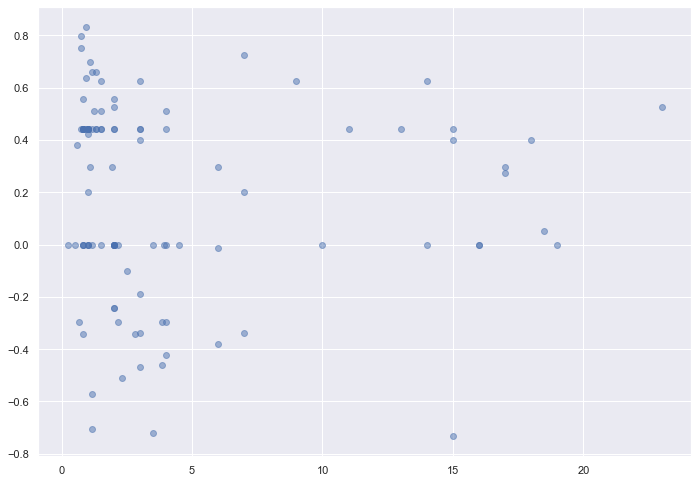

In [235]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q11_only['Q2 years'], df_q11_only['Q11_sore'], alpha=0.5)
plt.show()

Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  

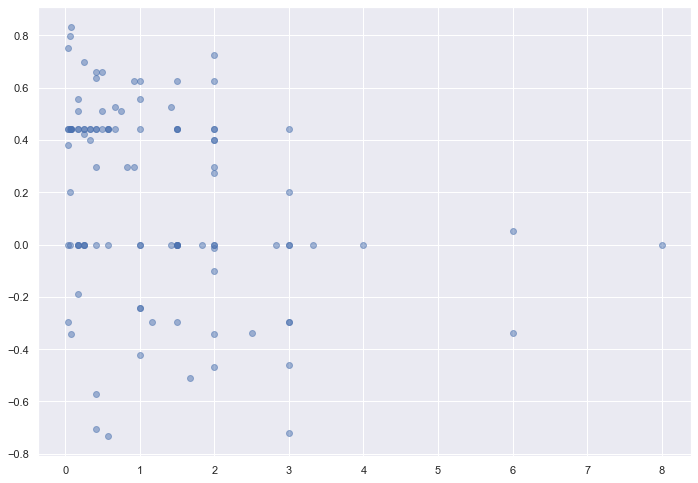

In [236]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q11_only['Q1 years'], df_q11_only['Q11_sore'], alpha=0.5)
plt.show()

# 4.6 Q10 x Q11 by Q12 hue
Q10: What is your impression of the relationships [DOD] have with their children here in [LOCATION]?  
Q11: What is your impression of the relationships [DOD] have with their significant others in [LOCATION]?  
Q12: Do you think there are problems here related to child abuse or domestic abuse? YES or NO 

In [237]:
q10_q11_senti = df['Q11'].dropna(axis=0)

In [238]:
#converting it to a df now
q10_q11_senti = q10_q11_senti.to_frame()

In [239]:
#sanity check
q10_q11_senti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q11     109 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [22]:
#code taken from nlp exercise 7 Metis
#analyzer = SentimentIntensityAnalyzer()
#q10_q11_senti['Q11_score'] = q10_q11_senti['Q11'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
#q10_q11_senti.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


In [241]:
#https://www.statology.org/pandas-merge-on-index/
#need to merge back it all columns
q10_q11_senti = pd.merge(df, q10_q11_senti, left_index=True, right_index=True)

In [242]:
q10_q11_senti.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      108 non-null    float64
 1   Q2 years      107 non-null    float64
 2   Q3            107 non-null    object 
 3   Q4            108 non-null    float64
 4   Q5            65 non-null     object 
 5   Q6            109 non-null    float64
 6   Q7            37 non-null     object 
 7   Q8            94 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           108 non-null    object 
 10  Q11_x         109 non-null    object 
 11  Q12           109 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           99 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  108 non-null    float64
 16  Q11_y         109 non-null    object 
 17  Q11_score     109 non-null    float64
dtypes: float64(7), object(11)
memo

In [243]:
q10_q11_senti = q10_q11_senti.drop('Q11_y', axis=1)
q10_q11_senti.rename(columns={"Q11_x": "Q11"}, inplace=True)

q10_q11_senti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 195
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      108 non-null    float64
 1   Q2 years      107 non-null    float64
 2   Q3            107 non-null    object 
 3   Q4            108 non-null    float64
 4   Q5            65 non-null     object 
 5   Q6            109 non-null    float64
 6   Q7            37 non-null     object 
 7   Q8            94 non-null     object 
 8   Q9            73 non-null     object 
 9   Q10           108 non-null    object 
 10  Q11           109 non-null    object 
 11  Q12           109 non-null    float64
 12  Q13           17 non-null     object 
 13  Q14           99 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  108 non-null    float64
 16  Q11_score     109 non-null    float64
dtypes: float64(7), object(10)
memory usage: 15.3+ KB


In [244]:
q10_q11_senti = q10_q11_senti.dropna(subset=['Q10'])

In [245]:
q10_q11_senti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 6 to 195
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      107 non-null    float64
 1   Q2 years      106 non-null    float64
 2   Q3            106 non-null    object 
 3   Q4            107 non-null    float64
 4   Q5            64 non-null     object 
 5   Q6            108 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            93 non-null     object 
 8   Q9            72 non-null     object 
 9   Q10           108 non-null    object 
 10  Q11           108 non-null    object 
 11  Q12           108 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14           98 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  107 non-null    float64
 16  Q11_score     108 non-null    float64
dtypes: float64(7), object(10)
memory usage: 15.2+ KB


In [246]:
analyzer = SentimentIntensityAnalyzer()
q10_q11_senti['Q10_score'] = q10_q11_senti['Q10'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

In [247]:
q10_q11_senti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 6 to 195
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      107 non-null    float64
 1   Q2 years      106 non-null    float64
 2   Q3            106 non-null    object 
 3   Q4            107 non-null    float64
 4   Q5            64 non-null     object 
 5   Q6            108 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            93 non-null     object 
 8   Q9            72 non-null     object 
 9   Q10           108 non-null    object 
 10  Q11           108 non-null    object 
 11  Q12           108 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14           98 non-null     object 
 14  Q15           78 non-null     object 
 15  Q16 rank_cat  107 non-null    float64
 16  Q11_score     108 non-null    float64
 17  Q10_score     108 non-null    float64
dtypes: float64(8), object(10)
memo

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#plot = sns.scatterplot(data=q10_q11_senti, x=q10_q11_senti["Q10_score"], y=q10_q11_senti["Q11_score"], 
                 #s=100,
               #palette=['blue'])
#plot.set_xlim(-1, 1)
#plot.set_ylim(-1, 1)
#plt.suptitle("Figure 5. Relationship between sentiment scores.")
#plt.xlabel("Impression of the relationships ", fontsize=13)
#plt.ylabel("Impression of the relationships ", fontsize=13)

In [249]:
#q10_q11_senti['Q10_score'].describe()

print(sum(q10_q11_senti['Q10_score'] < 0))


17


In [250]:
print(sum(q10_q11_senti['Q11_score'] < 0))


22


# 4.7 Q14
Q14: Can you tell me about your command's approach here related to family violence?  <b>Topic modeling and sentiment analysis</b>  

In [24]:
#q14 = df['Q14'].dropna(axis=0)
#q14

In [253]:
#converting it to a df now
q14 = q14.to_frame()

In [254]:
#sanity check
q14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q14     112 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [25]:
#code taken from nlp exercise 7 Metis
#analyzer = SentimentIntensityAnalyzer()
#q14['score'] = q14['Q14'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
#q14.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


In [256]:
q14.score.describe()

count    112.000000
mean       0.000506
std        0.306424
min       -0.848100
25%       -0.241100
50%        0.000000
75%        0.000000
max        0.867400
Name: score, dtype: float64

In [257]:
print(sum(q14['score'] < 0))

32


In [26]:
#print(q14[q14.score < 0 ])

In [259]:
print(sum(q14['score'] > 0))

25


In [27]:
#print(q14[q14.score > 0 ])

In [261]:
print(sum(q14['score'] == 0))

55


In [28]:
#print(q14[q14.score == 0])

In [263]:
#lowest score
#print(q14[q14.score == q14.score.min()])

                            Q14   score
53  meet violence with violence -0.8481


In [29]:
#highest score
#print(q14[q14.score == q14.score.max()])

In [265]:
#what is the average sentiment across the 109 responses?
q14.score.mean()
#pretty neutral score...

0.0005062500000000067

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences....  



In [266]:
#https://www.statology.org/pandas-merge-on-index/
df_q14_only = pd.merge(df, q14, left_index=True, right_index=True)

In [267]:
df_q14_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 194
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      110 non-null    float64
 1   Q2 years      108 non-null    float64
 2   Q3            111 non-null    object 
 3   Q4            111 non-null    float64
 4   Q5            70 non-null     object 
 5   Q6            112 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            91 non-null     object 
 8   Q9            70 non-null     object 
 9   Q10           99 non-null     object 
 10  Q11           99 non-null     object 
 11  Q12           112 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14_x         112 non-null    object 
 14  Q15           84 non-null     object 
 15  Q16 rank_cat  111 non-null    float64
 16  Q14_y         112 non-null    object 
 17  score         112 non-null    float64
dtypes: float64(7), object(11)
memo

In [268]:
df_q14_only = df_q14_only.drop('Q14_y', axis=1)
df_q14_only.rename(columns={"Q14_x": "Q14"}, inplace=True)

df_q14_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 194
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      110 non-null    float64
 1   Q2 years      108 non-null    float64
 2   Q3            111 non-null    object 
 3   Q4            111 non-null    float64
 4   Q5            70 non-null     object 
 5   Q6            112 non-null    float64
 6   Q7            36 non-null     object 
 7   Q8            91 non-null     object 
 8   Q9            70 non-null     object 
 9   Q10           99 non-null     object 
 10  Q11           99 non-null     object 
 11  Q12           112 non-null    float64
 12  Q13           16 non-null     object 
 13  Q14           112 non-null    object 
 14  Q15           84 non-null     object 
 15  Q16 rank_cat  111 non-null    float64
 16  score         112 non-null    float64
dtypes: float64(7), object(10)
memory usage: 15.8+ KB


In [269]:
df_q14_only["Q16 rank_cat"].value_counts()

1.0    68
2.0    23
3.0     7
4.0     7
5.0     5
6.0     1
Name: Q16 rank_cat, dtype: int64

In [270]:
df_q14_only.groupby(["Q16 rank_cat"]).score.mean()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

Q16 rank_cat
1.0    0.006193
2.0    0.027483
3.0   -0.163486
4.0    0.095371
5.0    0.065680
6.0   -0.848100
Name: score, dtype: float64

Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  


In [271]:
df_q14_only.groupby(["Q12"]).score.mean()

Q12
0.0    0.022174
1.0   -0.099165
Name: score, dtype: float64

Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    

In [272]:
df_q14_only.groupby(["Q6"]).score.mean()

Q6
0.0   -0.025415
1.0    0.059974
Name: score, dtype: float64

Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>

In [273]:
df_q14_only.groupby(["Q4"]).score.mean()

Q4
0.0   -0.046252
1.0    0.017049
Name: score, dtype: float64

Q2: How long have you been in the [DOD] (or connected to the [DOD], if civilian)?  <b>Coded as YEARS</b>  

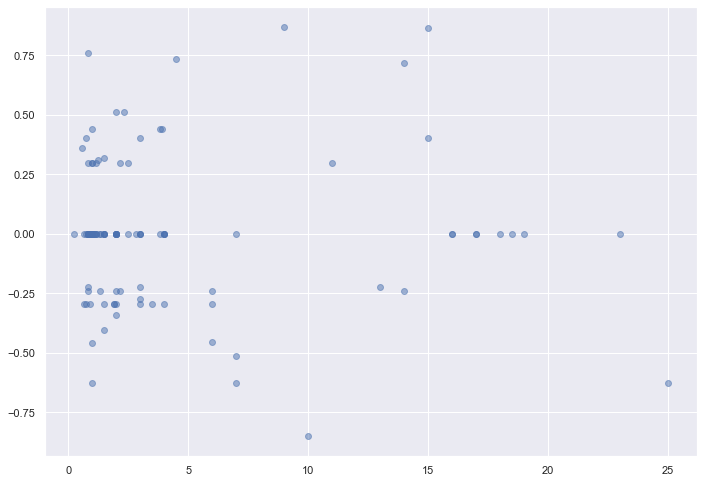

In [274]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q14_only['Q2 years'], df_q14_only['score'], alpha=0.5)
plt.show()

Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  

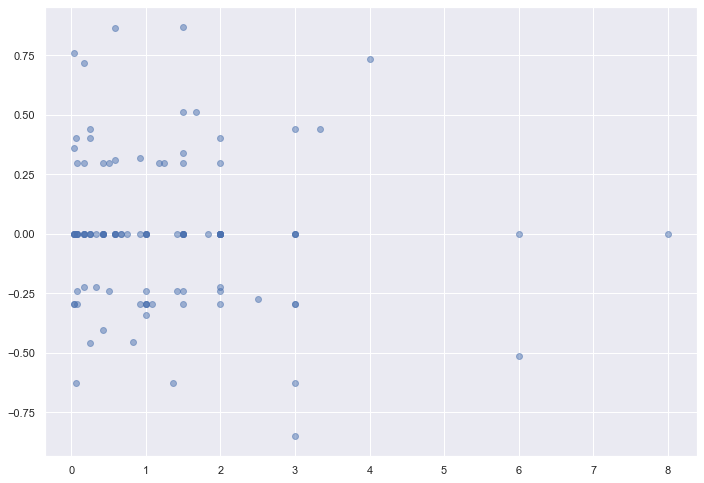

In [275]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q14_only['Q1 years'], df_q14_only['score'], alpha=0.5)
plt.show()

# 4.8 Q15
Q15: Is there anything else you'd like to comment on?  <b>Topic modeling and sentiment analysis</b>  

In [30]:
#q15 = df['Q15'].dropna(axis=0)
#q15

In [277]:
#converting it to a df now
q15 = q15.to_frame()

In [278]:
#sanity check
q15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 6 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q15     86 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


In [31]:
#code taken from nlp exercise 7 Metis
#analyzer = SentimentIntensityAnalyzer()
#q15['score'] = q15['Q15'].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
#q15.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


In [32]:
#lowest score
#print(q15[q15.score == q15.score.min()])

In [33]:
#highest score
#print(q15[q15.score == q15.score.max()])

In [282]:
#what is the average sentiment across the 109 responses?
q15.score.mean()
#pretty neutral score...

-0.21506860465116254

Let's merge back in Q1, Q2, Q4, Q6, Q12, Q16 to see differences.... 

In [283]:
#https://www.statology.org/pandas-merge-on-index/
df_q15_only = pd.merge(df, q15, left_index=True, right_index=True)

In [284]:
df_q15_only.info()
#need to delete duplicate variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 6 to 194
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      84 non-null     float64
 1   Q2 years      83 non-null     float64
 2   Q3            84 non-null     object 
 3   Q4            85 non-null     float64
 4   Q5            53 non-null     object 
 5   Q6            86 non-null     float64
 6   Q7            28 non-null     object 
 7   Q8            71 non-null     object 
 8   Q9            65 non-null     object 
 9   Q10           78 non-null     object 
 10  Q11           78 non-null     object 
 11  Q12           86 non-null     float64
 12  Q13           12 non-null     object 
 13  Q14           84 non-null     object 
 14  Q15_x         86 non-null     object 
 15  Q16 rank_cat  86 non-null     float64
 16  Q15_y         86 non-null     object 
 17  score         86 non-null     float64
dtypes: float64(7), object(11)
memor

In [285]:
df_q15_only = df_q15_only.drop('Q15_y', axis=1)
df_q15_only.rename(columns={"Q15_x": "Q15"}, inplace=True)

df_q15_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 6 to 194
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1 years      84 non-null     float64
 1   Q2 years      83 non-null     float64
 2   Q3            84 non-null     object 
 3   Q4            85 non-null     float64
 4   Q5            53 non-null     object 
 5   Q6            86 non-null     float64
 6   Q7            28 non-null     object 
 7   Q8            71 non-null     object 
 8   Q9            65 non-null     object 
 9   Q10           78 non-null     object 
 10  Q11           78 non-null     object 
 11  Q12           86 non-null     float64
 12  Q13           12 non-null     object 
 13  Q14           84 non-null     object 
 14  Q15           86 non-null     object 
 15  Q16 rank_cat  86 non-null     float64
 16  score         86 non-null     float64
dtypes: float64(7), object(10)
memory usage: 12.1+ KB


In [286]:
df_q15_only["Q16 rank_cat"].value_counts()

1.0    56
2.0    19
4.0     5
5.0     3
3.0     2
6.0     1
Name: Q16 rank_cat, dtype: int64

In [287]:
df_q15_only.groupby(["Q16 rank_cat"]).score.mean()

#E1-E3: Junior (1)  
#E4-E5: NCO (2)  
#E6+: SNCO (3)  
#Officer: O1+ (4)  
#Spouse/Dep: (5)  
#Other: (6)

Q16 rank_cat
1.0   -0.255818
2.0   -0.248184
3.0   -0.466450
4.0    0.066240
5.0    0.416600
6.0   -0.102700
Name: score, dtype: float64

Q12: Do you think there are problems here related to child abuse or domestic abuse?  <b>Coded as Yes (1), No (0)</b>  


In [288]:
df_q15_only.groupby(["Q12"]).score.mean()

Q12
0.0   -0.237074
1.0   -0.101900
Name: score, dtype: float64

Q6: Do you have awareness of the prevention services offered by the [CLINIC]?  <b>Coded as Yes (1), No (0)</b>    

In [289]:
df_q15_only.groupby(["Q6"]).score.mean()

Q6
0.0   -0.230051
1.0   -0.182330
Name: score, dtype: float64

Q4: Do you have awareness of the [CLINIC] and what it does?  <b>Coded as Yes (1), No (0)</b>

In [290]:
df_q15_only.groupby(["Q4"]).score.mean()

Q4
0.0   -0.186120
1.0   -0.223046
Name: score, dtype: float64

Q2: How long have you been in the [DOD] (or connected to the [DOD], if civilian)?  <b>Coded as YEARS</b>  

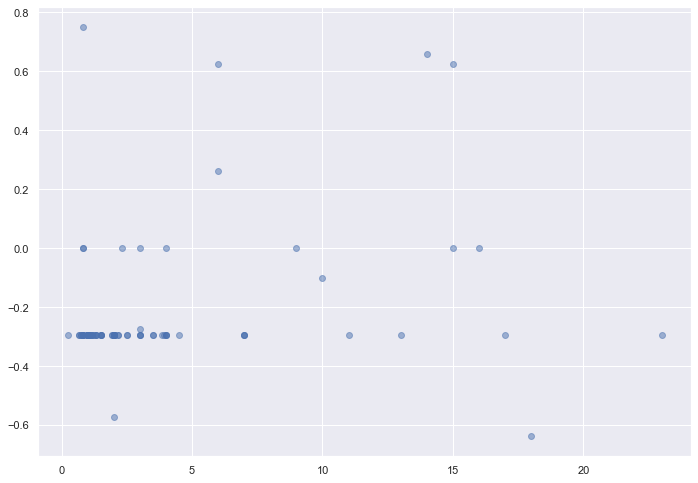

In [291]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q15_only['Q2 years'], df_q15_only['score'], alpha=0.5)
plt.show()

Q1: How long have you been on [LOCATION]?  <b>Coded as YEARS</b>  

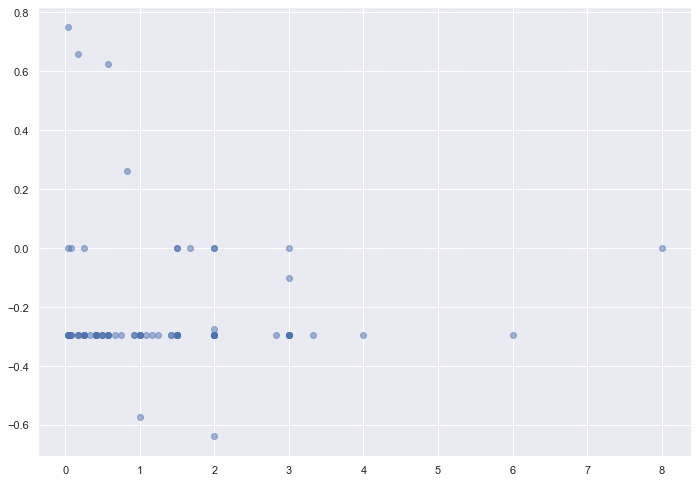

In [292]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_q15_only['Q1 years'], df_q15_only['score'], alpha=0.5)
plt.show()